In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
!pip install nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download("omw-1.4")

In [562]:
import re
import nltk.corpus
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

# Stemming 
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()

#Lm
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()





## Steps we're going to perform in ML project


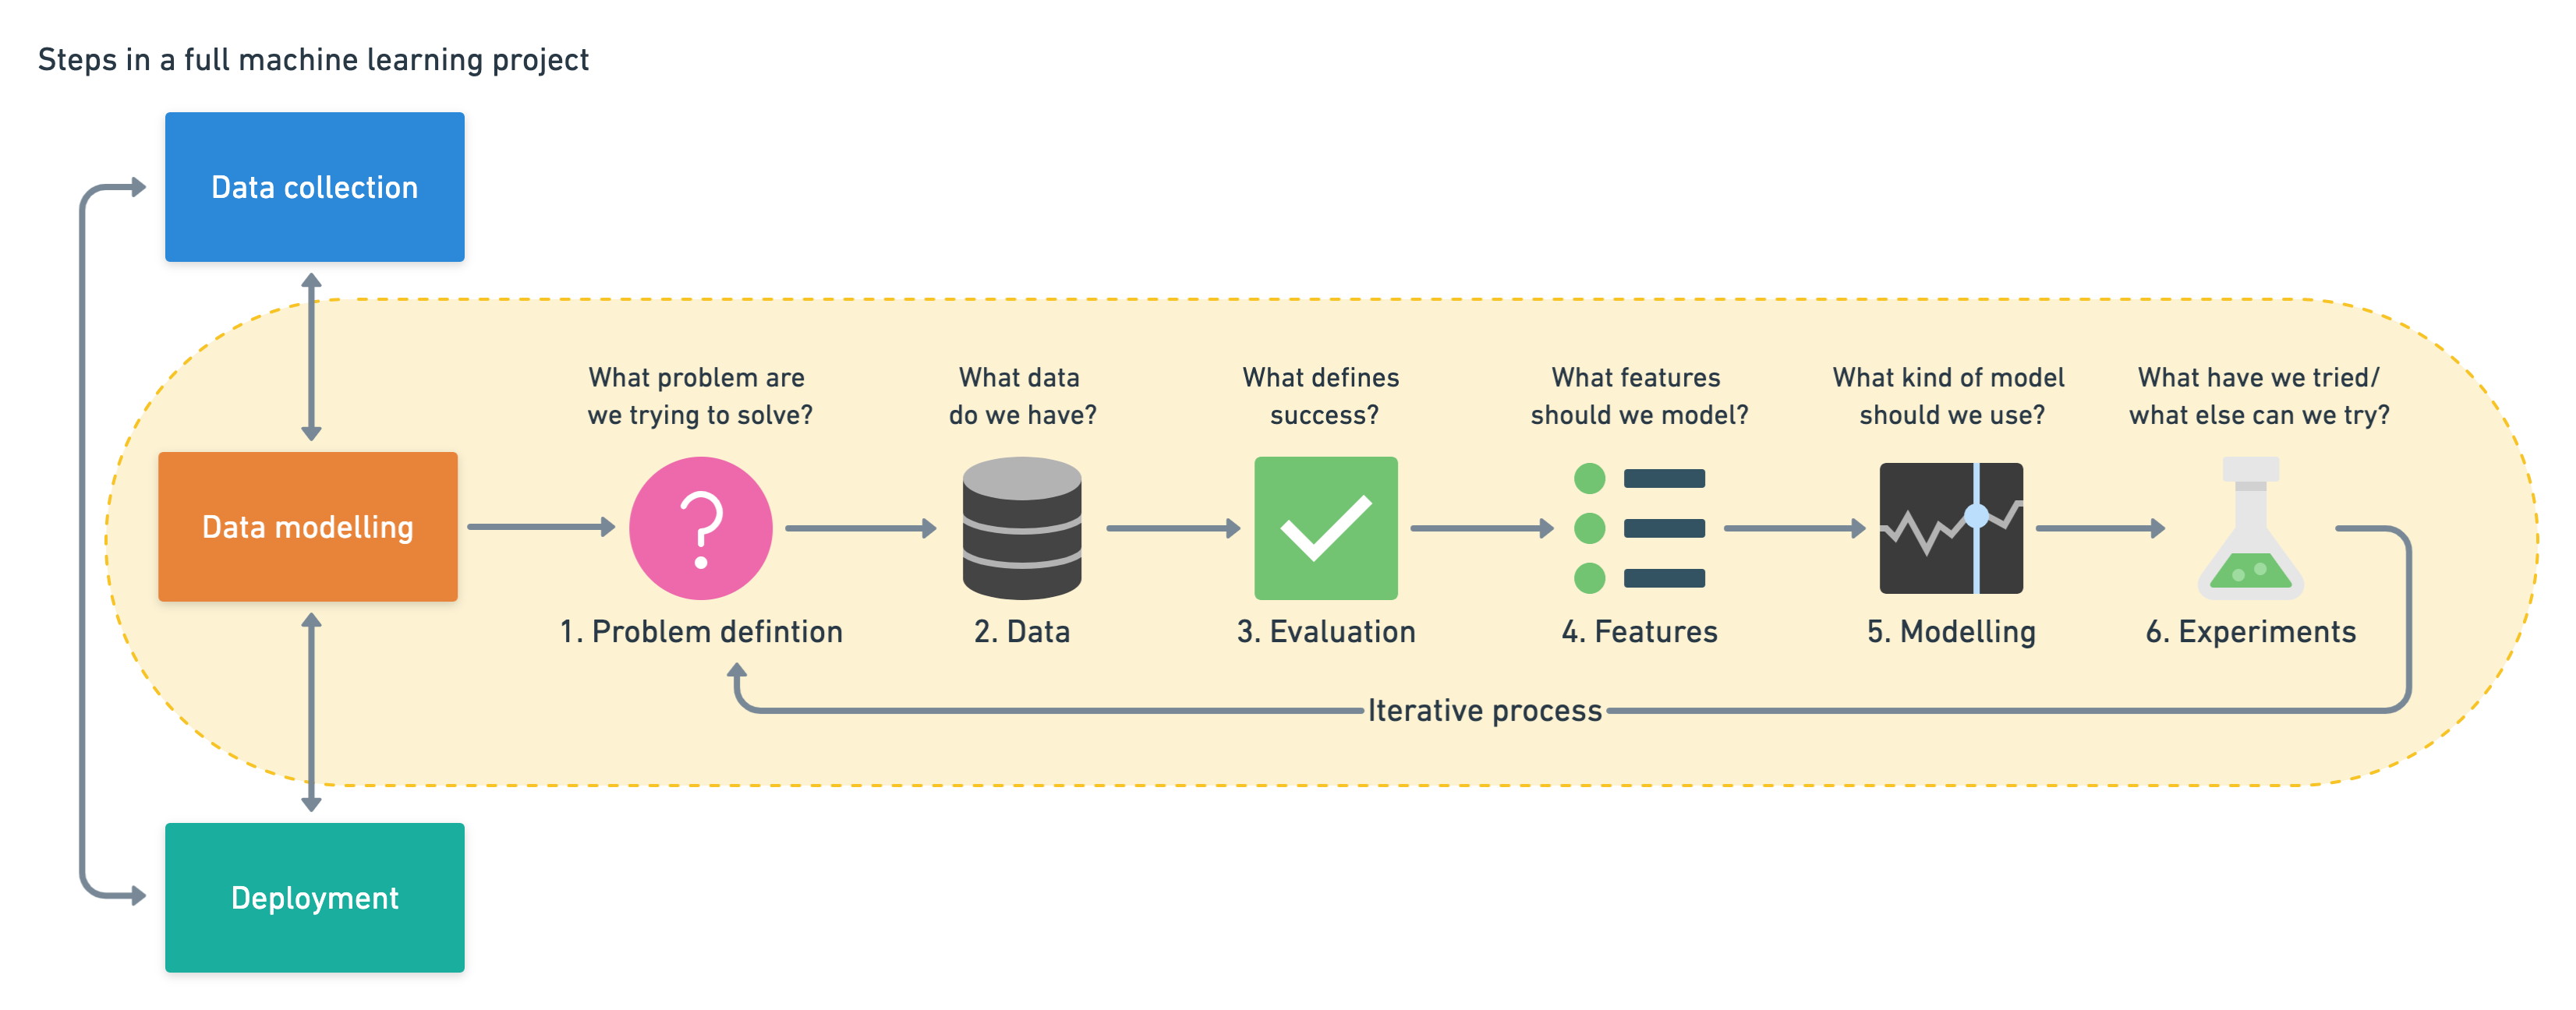


# Reading CSV Files

In [573]:
f_df = pd.read_csv("data/features.csv")

patient_notes_df=pd.read_csv("data/patient_notes.csv")
test_df=pd.read_csv("data/test.csv")
train_df=pd.read_csv("data/train.csv")

In [574]:
f_df.head(1)

,feature_num,case_num,feature_text
0,0,0,Family-history-of-MI-OR-Family-history-of-myoc...


In [32]:
def find_length_of_column(x):
    return len(x)

In [106]:
f_df["len_feat_txt"]=f_df["feature_text"].apply(len)

In [535]:
f_df.head(1)

,feature_num,case_num,feature_text,feature_text w/o stop words,feature_text word count
0,0,0,family history of mi or family history of myoc...,family history mi family history myocardial in...,10


In [73]:
patient_notes_df.head(1)

,pn_num,case_num,pn_history
0,0,0,"17-year-old male, has come to the student heal..."


In [27]:
train_df.head(1)

,id,case_num,pn_num,feature_num,annotation,location
0,00016_000,0,16,0,['dad with recent heart attcak'],['696 724']


# EDA 

# Data Cleaning

I'm combining every step in the function as I go thru : 
Steps are : 

1. Normalizing Text --> Lower Case
2. Removing Special Characters
3. Removing stop words

###  COLUMN TRANSFORMATION

In [508]:
patient_notes_df.pn_history=patient_notes_df.pn_history.astype(str)
#transform train datatypes 
train_df.id = train_df.id.astype(int)
train_df.annotation = train_df.annotation.astype(str)
train_df.location = train_df.location.astype(str)

#transform test datatypes
test_df.id = test_df.id.astype(int)

In [366]:
stop = set(stopwords.words('english'))

In [480]:
text_2="Hello My name is akash---"
token_1 = word_tokenize(text_2)
#np.count_nonzero(token_1)
token_1= re.sub(r"(-)"," ", text_2)
#token_1 = generate_n_grams(text_2)
token_1

'Hello My name is akash   '

### Defining text cleaning functions

In [572]:
# For removing unicode characters from the texts 
def remove_spec_chars(text_):
    text_ = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?",
           "", text_)
    return text_;

def replace_hip_space(text_):
    text_ = re.sub(r"(-or-)",", ", text_)
    return re.sub(r"(-)"," ", text_);

#removing stop words from the text 
def remove_stop_words(text, stop=stop):
    #print("stop",stop)
    words = word_tokenize(text)
    text = " ".join([word for word in words if word not in stop])
    return text;

def token_count(text_):
    temp = word_tokenize(text_)
    return np.count_nonzero(temp);

#n_gram function 
def generate_n_grams(text, ngram=1):
    words = [word for word in text.split()]
    temp=zip(*[words[i:] for i in range(0, ngram)])
    ans=[' '.join(ngram) for ngram in temp]
    return ans;

#Stemming=> is the process of getting the root form of a word.
def stem_words(text_):
    word_tokens = word_tokenize(text_)
    stems =' '.join([stemmer.stem(word) for word in word_tokens])
    return stems

#Lemmatize => root form from language --> not required for this dataset
def lemmatize_word(text_):
    word_tokens = word_tokenize(text_)
    lemmas = [lemmatizer.lemmatize(word, pos='v') for word in word_tokens]
    return lemmas


def data_cleaning(df):
    for label,content in df.items():
        if pd.api.types.is_string_dtype(content):
            print(f"Transformation for the column {label} : Started ...")
            df[label]=content.apply(lambda x:x.lower())
            if label !="location":
                df[label]=content.apply(replace_hip_space)
                #df[label]=content.apply(remove_spec_chars) #Not required, as we will be using original text 
                df[label+"_exc_stop_words"]=content.apply(remove_stop_words)
                df[label+"_word_count"]=content.apply(token_count)
                df[label+"_stemmed"]=content.apply(stem_words)
            print(f"Transformation for the column {label} : Ended ...")
    return df;

In [575]:
#Calling Text Cleaning functions for each of the dataframe 
f_df=data_cleaning(f_df)
patient_notes_df=data_cleaning(patient_notes_df)
train_df=data_cleaning(train_df)
test_df=data_cleaning(test_df)

Transformation for the column feature_text : Started ...
Transformation for the column feature_text : Ended ...
Transformation for the column pn_history : Started ...
Transformation for the column pn_history : Ended ...
Transformation for the column id : Started ...
Transformation for the column id : Ended ...
Transformation for the column annotation : Started ...
Transformation for the column annotation : Ended ...
Transformation for the column location : Started ...
Transformation for the column location : Ended ...
Transformation for the column id : Started ...
Transformation for the column id : Ended ...


In [532]:
#Checking if special characters are removed or not 
d_quotes = train_df["annotation"].apply(lambda x : x.count("\""))
s_quotes = train_df["annotation"].apply(lambda x : x.count("\'"))
np.average(d_quotes), np.min(d_quotes), np.max(d_quotes), np.average(s_quotes), np.min(s_quotes), np.max(s_quotes)

(0.012867132867132867, 0, 5, 1.7081118881118882, 0, 16)

# Data Visualization

In [547]:
f_df.head(1)
train_df.head(1)

,id,case_num,pn_num,feature_num,annotation,location
0,00016_000,0,16,0,['dad with recent heart attcak'],['696 724']


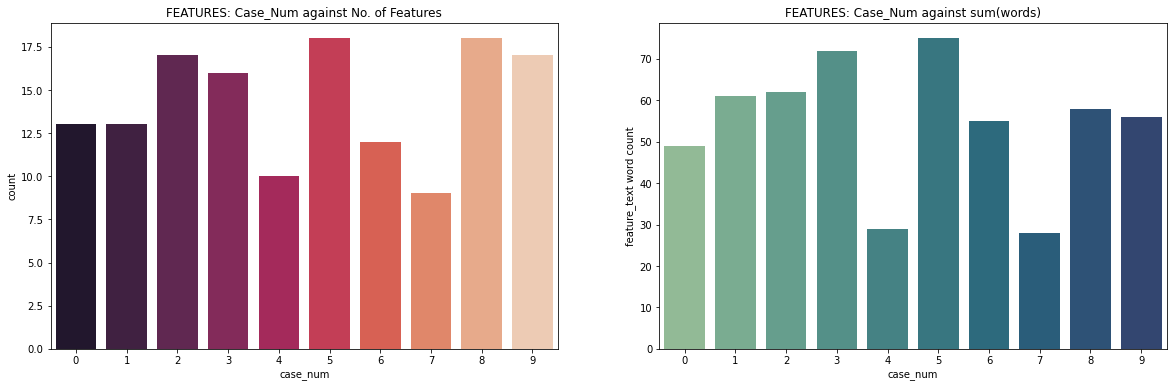

In [528]:
#f_df_count=f_df.groupby(by=["case_num"]).count()
f_df_sum=f_df.groupby(by=["case_num"]).sum()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sb.countplot(x=f_df.case_num,  ax=ax[0], palette='rocket', );
sb.barplot(x=f_df_sum.index, y=f_df_sum["feature_text word count"], ax=ax[1], palette='crest');
ax[0].set_title("FEATURES: Case_Num against No. of Features");
ax[1].set_title("FEATURES: Case_Num against sum(words)");

In [504]:
patient_notes_df.head(1)

,pn_num,case_num,pn_history,pn_history w/o stop words,pn_history word count
0,0,0,17 year old male has come to the student healt...,17 year old male come student health clinic co...,95


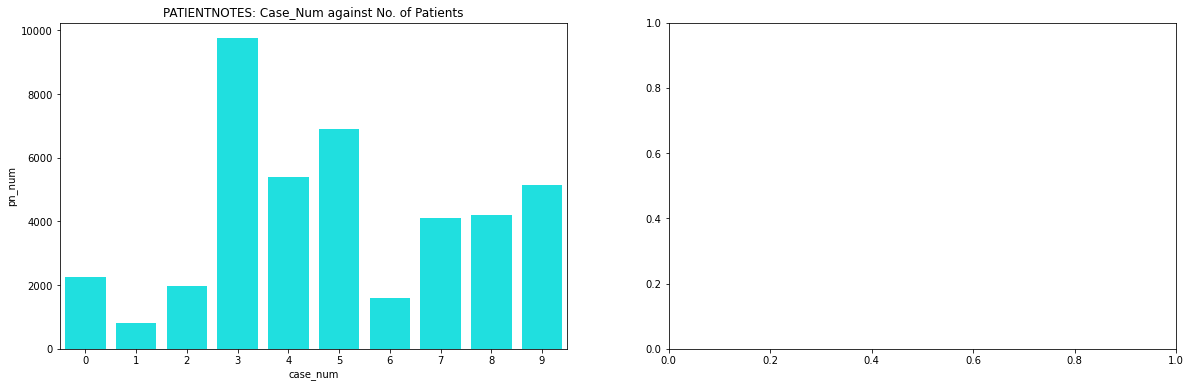

In [327]:
p_case_count_df=patient_notes_df.groupby(by=["case_num"]).count()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sb.barplot(x=p_case_count_df.index, y=p_case_count_df.pn_num, ax=ax[0], color='cyan');
ax[0].set_title("PATIENTNOTES: Case_Num against No. of Patients");

In [516]:
train_df.head(1)

,id,case_num,pn_num,feature_num,annotation,location
0,16000,0,16,0,['dad with recent heart attcak'],['696 724']


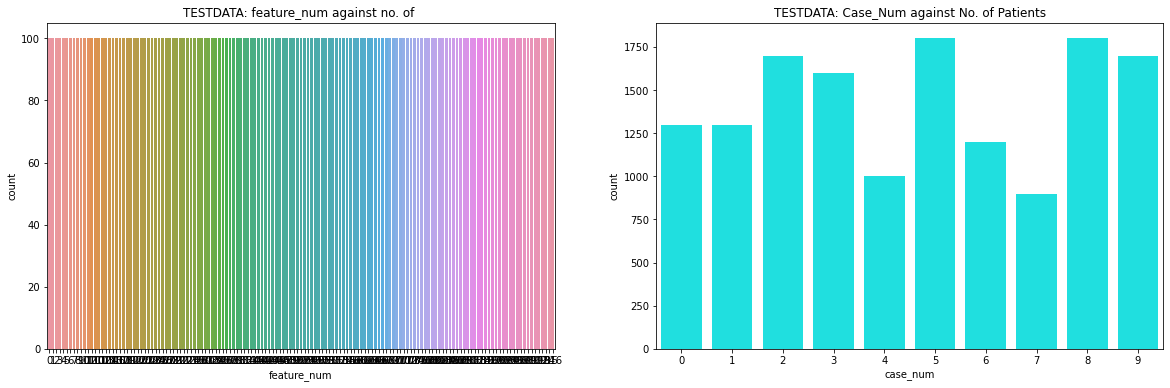

In [517]:
#train_feat_count=train_df.groupby(by=["feature_num"]).count()
#train_case_count=train_df.groupby(by=["case_num"]).count()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sb.countplot(x=train_df.feature_num, ax=ax[0]);
sb.countplot(x=train_df.case_num, ax=ax[1], color='cyan');
ax[0].set_title("TESTDATA: feature_num against no. of ");
ax[1].set_title("TESTDATA: Case_Num against No. of Patients");

In [336]:
#len(train_df.groupby(by=["pn_num"]).count())

In [337]:
#train_df.groupby(by=["feature_num"]).count()

In [338]:
#len(train_df.groupby(by=["case_num"]).count())

## Counts 
### pn_num=1000    feature_num=143        case_num=10

In [509]:
f_df.head(1)

,feature_num,case_num,feature_text
0,0,0,Family-history-of-MI-OR-Family-history-of-myoc...


In [512]:
f_df["feature_text"][0].replace("-OR-", " ")

'Family-history-of-MI Family-history-of-myocardial-infarction'